In [2]:
import numpy as np
import pandas as pd

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


Exploratory Data Analysis

In [7]:
df1=pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')
df2=pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')

In [8]:
data=pd.merge(df1,df2)
data.head()

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent),DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


Data Cleaning

In [9]:
data.isnull().sum()

Entity                                                                                               0
Code                                                                                               690
Year                                                                                                 0
Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)                             0
Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)                          0
Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)                         0
Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)                        0
Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)                      0
Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (P

In [10]:
data=data.drop(['Code'],axis=1)

In [13]:
data.head()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorders,Anxiety,Drug_usage,Depression,Alcohol,Mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


In [12]:
#rename columns in data
data.set_axis(['Country','Year','Schizophrenia','Bipolar_disorder','Eating_disorders','Anxiety','Drug_usage','Depression','Alcohol','Mental_fitness'],axis='columns',inplace=True)

[]

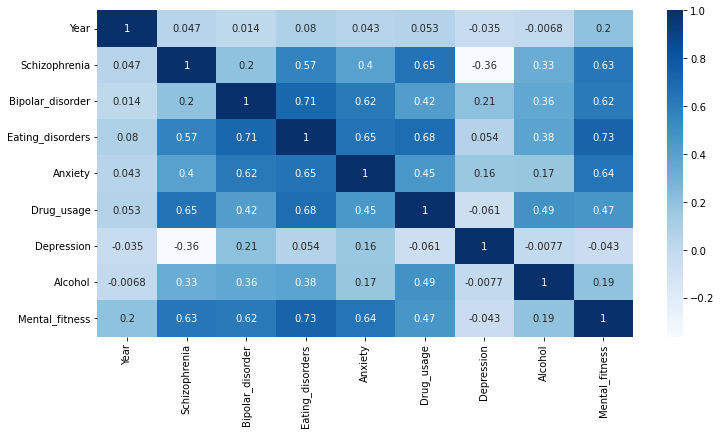

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.plot()

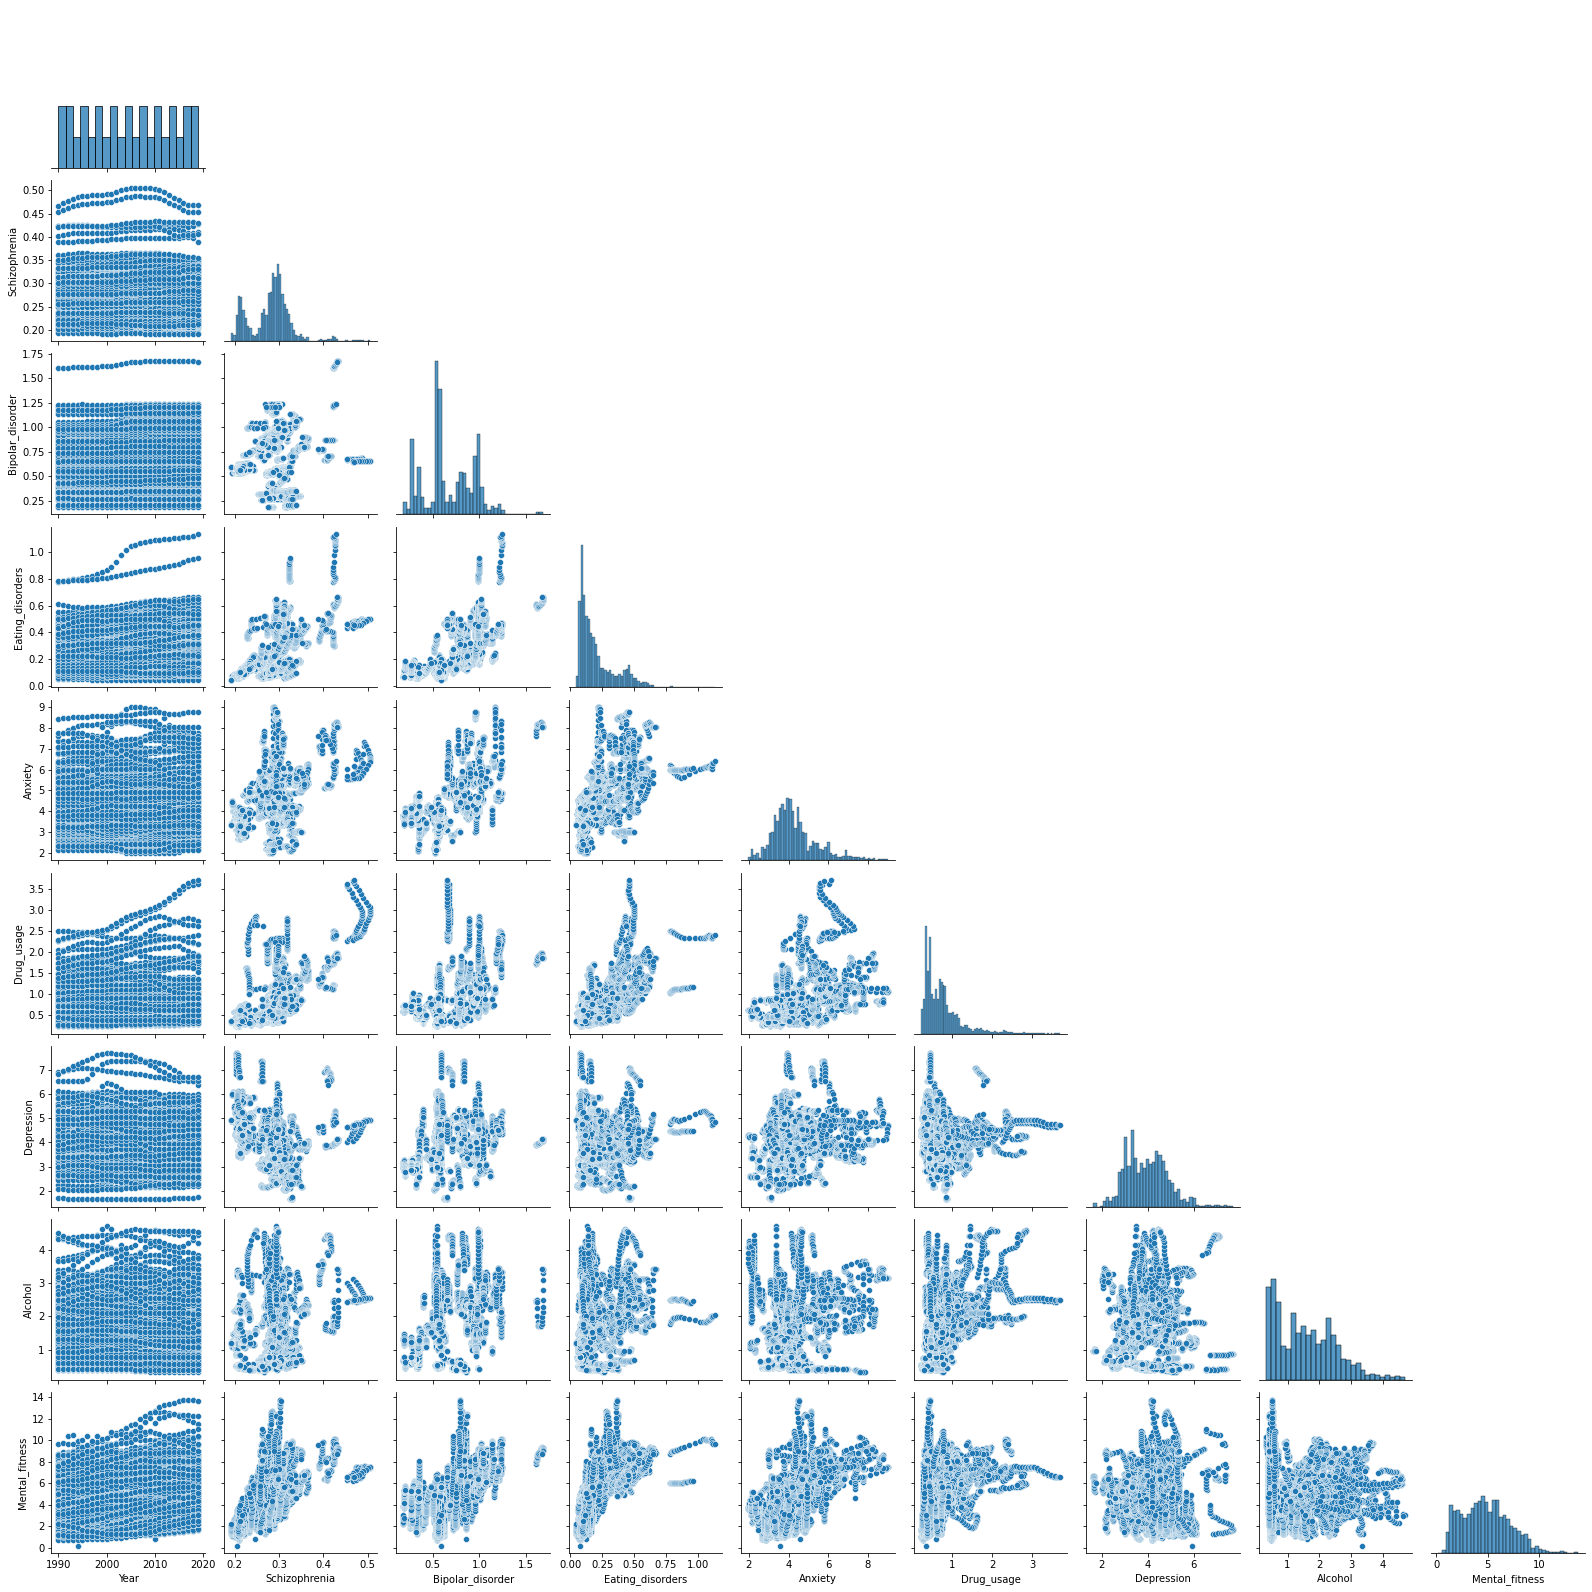

In [17]:
sns.pairplot(data,corner=True)
plt.show()

Machine Learning Modeling

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorders  6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   Drug_usage        6840 non-null   float64
 7   Depression        6840 non-null   float64
 8   Alcohol           6840 non-null   float64
 9   Mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 845.9+ KB


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=le.fit_transform(data[i])

In [24]:
x=data.drop(['Mental_fitness'],axis=1)
y=data['Mental_fitness']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [26]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
#prediction
y_pred=lr.predict(x_test)

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7367409543915842

Random forest Algorithm

In [30]:
#prediction
y_pred1=rf.predict(x_test)

# Model for Mental Fitness Tracker

In [29]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

# Accuracy of Model

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.9917731332118798